In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from typing import List
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [7]:
# Import necessary libraries
#import Data
data_path = "/Users/Rihannat/Downloads/dataset_bank_customer_churn_prediction/dataset_bank_customer_churn_prediction/dataset_churn_modelling.csv"
bank_churn = pd.read_csv(data_path)
bank_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
bank_churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
bank_churn.shape

(10000, 14)

In [11]:
bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
bank_churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
#checking for duplicate
duplicate_value = bank_churn.duplicated()
print(duplicate_value.sum())
bank_churn[duplicate_value]

0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [14]:
skew = bank_churn["Age"].skew()
skew

1.0113202630234552

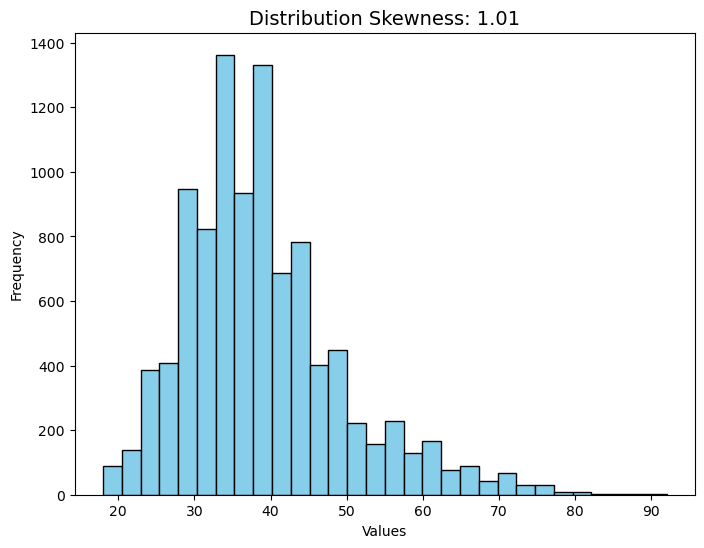

In [15]:
#skew distribution
plt.figure(figsize=(8, 6))
bank_churn["Age"].hist(bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution Skewness: {skew:.2f}', fontsize=14)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

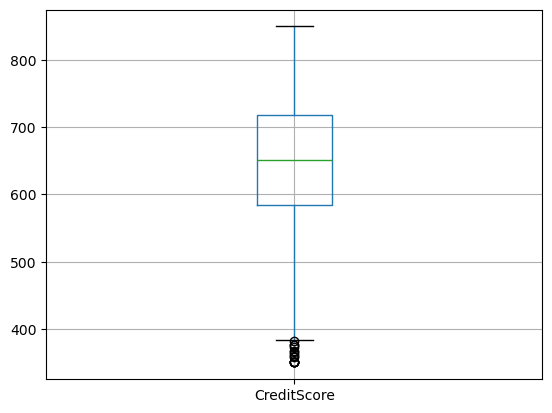

In [16]:
#Checking for outliers
bank_churn.boxplot(column = ['CreditScore'])
plt.show

In [17]:
#identify outlier
quartile1 = bank_churn["CreditScore"].quantile(0.25)
quartile3 = bank_churn["CreditScore"].quantile(0.75)

interquartile_range = quartile3 - quartile1
upper_limit = quartile3 + 1.5 * interquartile_range
lower_limit = quartile1 - 1.5 * interquartile_range
upper_limit, lower_limit

(919.0, 383.0)

In [18]:
bank_churn[(bank_churn["CreditScore"] < lower_limit) | (bank_churn["CreditScore"] > upper_limit)].any(axis=None)

True

In [19]:
bank_churn[(bank_churn["CreditScore"] < lower_limit) | (bank_churn["CreditScore"] > upper_limit)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
942,943,15804586,Lin,376,France,Female,46,6,0.00,1,1,0,157333.69,1
1193,1194,15779947,Thomas,363,Spain,Female,28,6,146098.43,3,1,0,100615.14,1
1405,1406,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1
1631,1632,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1
1838,1839,15758813,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1
1962,1963,15692416,Aikenhead,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1
2473,2474,15679249,Chou,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1
2579,2580,15597896,Ozoemena,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1
8154,8155,15791533,Ch'ien,367,Spain,Male,42,6,93608.28,1,1,0,168816.73,1


In [21]:
#Removing outliers
clean_bank_churn = bank_churn[~((bank_churn["CreditScore"] < lower_limit) | (bank_churn["CreditScore"] > upper_limit))]
clean_bank_churn.shape

(9985, 14)

In [22]:
#correlation 
numeric_column = clean_bank_churn.select_dtypes(include=['float64', 'int64'])
correlation = numeric_column.corr()
correlation


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.003613,0.005145,0.000555,-0.006596,-0.007829,0.008946,0.000806,0.011175,-0.005876,-0.016150
CustomerId,0.003613,1.000000,0.007245,0.009062,-0.015161,-0.011630,0.017256,-0.014022,0.001808,0.014794,-0.007538
CreditScore,0.005145,0.007245,1.000000,-0.002000,-0.000645,0.007077,0.012318,-0.003949,0.023622,0.001609,-0.018384
Age,0.000555,0.009062,-0.002000,1.000000,-0.010186,0.028466,-0.029773,-0.011702,0.085773,-0.007941,0.285134
Tenure,-0.006596,-0.015161,-0.000645,-0.010186,1.000000,-0.011851,0.013042,0.022401,-0.028292,0.008333,-0.013080
Balance,-0.007829,-0.011630,0.007077,0.028466,-0.011851,1.000000,-0.305995,-0.015180,-0.009726,0.012513,0.118517
NumOfProducts,0.008946,0.017256,0.012318,-0.029773,0.013042,-0.305995,1.000000,0.003163,0.010379,0.014649,-0.048075
HasCrCard,0.000806,-0.014022,-0.003949,-0.011702,0.022401,-0.015180,0.003163,1.000000,-0.011851,-0.010444,-0.008216
IsActiveMember,0.011175,0.001808,0.023622,0.085773,-0.028292,-0.009726,0.010379,-0.011851,1.000000,-0.011352,-0.155228
EstimatedSalary,-0.005876,0.014794,0.001609,-0.007941,0.008333,0.012513,0.014649,-0.010444,-0.011352,1.000000,0.010171


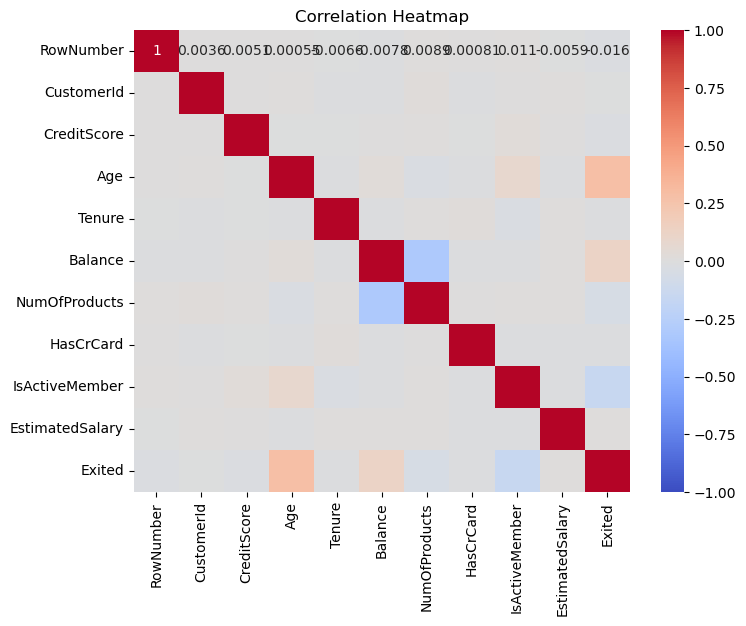

In [23]:
#Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [24]:
# Split the data into training and test sets
#splitting the dataset
shuffled_df = clean_bank_churn.sample(frac=1, random_state=42)
train_df, test_df = train_test_split(shuffled_df, test_size=0.02, random_state=42)
train_df.shape, test_df.shape

((9785, 14), (200, 14))

In [31]:
#removing column
y = train_df['Exited']
train_df.drop('Exited', axis=1, inplace=True)
train_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8429,8430,15681671,Nkemjika,850,Germany,Male,28,2,101100.22,2,1,1,35337.31
5173,5174,15705281,Burt,800,Spain,Male,38,9,0.00,1,1,0,78744.39
4581,4582,15746127,Hort,572,France,Female,47,2,0.00,2,1,0,36099.70
1704,1705,15739054,Y?,654,France,Female,29,4,96974.97,1,0,1,141404.07
5318,5319,15708046,Knowles,744,Spain,Male,31,0,117551.23,1,1,0,158958.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375,3376,15733234,Moretti,777,France,Female,58,4,0.00,1,1,1,62449.07
3235,3236,15612465,Siciliano,684,Spain,Male,34,9,100628.00,2,1,1,190263.78
3129,3130,15694453,Walker,631,Germany,Male,37,9,131519.49,2,1,1,51752.18
7916,7917,15610936,Becher,562,France,Male,33,6,0.00,2,1,0,111590.35


In [26]:
def label_encoder(df: pd.DataFrame, cat_columns: List[str]):

    categorical_features = df[cat_columns]  # Replace with your categorical feature names

    # Apply label encoding to each categorical feature
    label_encoder = LabelEncoder()
    encoded_features = categorical_features.apply(label_encoder.fit_transform)

    # Replace the original categorical features with the encoded features in the DataFrame
    df_encoded = df.copy()
    df_encoded[cat_columns] = encoded_features  

    return df_encoded

In [27]:
#encoding string to int
cat_cols_ = []
for cols in train_df.columns:
    if train_df[cols].dtype == "object":
        cat_cols_.append(cols)

In [32]:
cat_columns = [cols for cols in train_df.columns if train_df[cols].dtype == "object"]
label_encoded_df = label_encoder(train_df, cat_columns)
label_encoded_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8429,8430,15681671,1927,850,1,1,28,2,101100.22,2,1,1,35337.31
5173,5174,15705281,373,800,2,1,38,9,0.00,1,1,0,78744.39
4581,4582,15746127,1202,572,0,0,47,2,0.00,2,1,0,36099.70
1704,1705,15739054,2833,654,0,0,29,4,96974.97,1,0,1,141404.07
5318,5319,15708046,1411,744,2,1,31,0,117551.23,1,1,0,158958.90


In [33]:
# Split the data into training and test sets
#splitting data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(label_encoded_df, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7828, 13), (1957, 13), (7828,), (1957,))

In [34]:
# Fit the model to the training data
#create and train logistic 
logic  = make_classification(n_samples = 1000,n_features = 10,n_informative = 5)
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [35]:
# Make predictions on the training data
#make prediction
predict = model.predict(x_test)
print(predict)

[0 0 0 ... 0 0 0]


In [62]:
# Make predictions on the training data
#evaluate model
print("Accuracy:",accuracy_score(y_test,predict))
print("Classification Report:")
print(classification_report(y_test,predict))

Accuracy: 0.7940725600408789
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.89      1554
           1       0.00      0.00      0.00       403

    accuracy                           0.79      1957
   macro avg       0.40      0.50      0.44      1957
weighted avg       0.63      0.79      0.70      1957



C:\Users\Rihannat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rihannat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rihannat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
# Fit the model to the training data
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [52]:
# Make predictions on the training data
predict = model.predict(x_train)
print(predict)

[0.24679014 0.04169563 0.36323781 ... 0.21787761 0.24318078 0.00921121]


In [53]:
# Make predictions on the training data
rmse_train = mean_squared_error(y_train,predict)**(0.5)
rmse_train

0.3733556680190045

In [54]:
# Make predictions on the training data
predict_test = model.predict(x_test)
print(predict_test)

[0.28689593 0.11996773 0.02655838 ... 0.3921556  0.02635609 0.16071089]


In [55]:
# Make predictions on the training data
rmse_test = mean_squared_error(y_test,predict_test)**(0.5)
rmse_test

0.3737571412494885

In [56]:
# Initialize and train a Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
# Make predictions on the training data
predict_train = model.predict(x_train)
predict_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
# Make predictions on the training data
accuracy_train = accuracy_score(y_train,predict_train)
accuracy_train

1.0

In [75]:
test_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1336,1337,15682563,Larionova,618,Spain,Male,38,5,126473.99,1,1,0,91972.49,0
5068,5069,15717879,Chen,712,Spain,Female,79,5,108078.56,1,1,1,174118.93,0
8414,8415,15648367,Lo,600,Germany,Female,29,6,74430.10,2,1,1,96051.10,0
6844,6845,15601627,Siciliano,587,France,Male,33,8,148163.57,1,0,0,122925.40,0
3366,3367,15684010,Tuan,640,Germany,Female,74,2,116800.25,1,1,1,34130.43,0


In [90]:
def label_encoder(df: pd.DataFrame, cat_columns: List[str]):

    categorical_features = df[cat_columns]  # Replace with your categorical feature names

    # Apply label encoding to each categorical feature
    label_encoder = LabelEncoder()
    encoded_features = categorical_features.apply(label_encoder.fit_transform)

    # Replace the original categorical features with the encoded features in the DataFrame
    df_encoded = df.copy()
    df_encoded[cat_columns] = encoded_features  

    return df_encoded

In [93]:
#encoding string to int
cat_cols_ = []
for cols in test_df.columns:
    if test_df[cols].dtype == "object":
        cat_cols_.append(cols)

In [ ]:
cat_columns = [cols for cols in test.columns if test[cols].dtype == "object"]
test_encoded_df = label_encoder(test, cat_columns)
test_encoded_df.head()

In [82]:
test_target = label_encoded_df['Exited']
label_encoded_df.drop("Exited", axis=1, inplace=True)

In [85]:
test_pred = model.predict(label_encoded_df)

In [87]:
test_df = pd.DataFrame({
    "test_pred": test_pred,
    "test_target": test_target
})

In [88]:
test_df

,test_pred,test_target
1336,0,0
5068,1,0
8414,0,0
6844,0,0
3366,0,0
...,...,...
2465,0,0
2776,0,0
4968,0,0
7970,0,0
